**Problem Statement**

A bank is facing an increasing number of defaults on loans, and needs to improve its credit risk modeling in order to better predict which customers are likely to default on their loans in the future.

The bank needs to identify customers who are at high risk of defaulting on their loans in order to take appropriate action, such as increasing the interest rate on the loan or declining the loan application. This will help the bank reduce its overall risk and increase its profitability.

By accurately identifying high-risk customers, the bank can also improve its customer relationships by being more transparent about the terms of the loan. Additionally, the bank can use the results of the credit risk modeling to inform its marketing and sales strategies, targeting higher-risk customers with more appropriate products and services.

The goal is to accurately identify high-risk loans in order to take appropriate action, such as increasing the interest rate on the loan or declining the loan application, which will help the bank reduce its overall risk and increase its profitability.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
import numpy as np

**Load Dataset**

In [2]:

data_init = pd.read_csv(r'D:/Foundations_of_DataScience/Projects/Mid_project\Dataset10/loan_data_2015.csv')

C:\Users\jasth\AppData\Local\Temp\ipykernel_33668\176694538.py:2: DtypeWarning: Columns (19,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data_init = pd.read_csv(r'D:/Foundations_of_DataScience/Projects/Mid_project\Dataset10/loan_data_2015.csv')


**Dataset analysis**

In [3]:
data_init.shape

(421094, 74)

In [4]:
data_init.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

**Reducing the number of columns by choosing required only**

In [5]:
data=data_init[['id','loan_amnt', 'funded_amnt', 'revol_bal','total_rev_hi_lim',
           'int_rate','installment','total_pymnt','total_rec_late_fee','recoveries','last_pymnt_amnt','out_prncp','total_rec_prncp','total_rec_int',
           'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','total_acc','pub_rec',
           'dti','dti_joint','annual_inc','verification_status',
           'revol_util',
           'emp_length','home_ownership',
           'pymnt_plan','installment','grade','sub_grade','loan_status','purpose','acc_now_delinq','mths_since_last_delinq','addr_state']].copy()

**Initial Data Analysis (IDA)**

**Describe the data**

In [6]:
print(data.describe().T.to_csv())

,count,mean,std,min,25%,50%,75%,max
id,421094.0,53930940.469182655,9475415.892392706,56705.0,46124812.25,55360302.0,61862157.5,68617057.0
loan_amnt,421094.0,15240.25556051618,8571.313524640931,1000.0,8500.0,14000.0,20000.0,35000.0
funded_amnt,421094.0,15240.25556051618,8571.313524640931,1000.0,8500.0,14000.0,20000.0,35000.0
revol_bal,421094.0,17685.483732848246,24195.05745710915,0.0,6480.0,11996.0,21428.0,2904836.0
total_rev_hi_lim,421094.0,33657.50515561846,37663.85798822135,0.0,14400.0,24600.0,41674.25,9999999.0
int_rate,421094.0,12.601731038675455,4.317873178684985,5.32,9.17,12.29,15.59,28.99
installment,421094.0,441.87271908409997,244.85754859724273,30.12,263.93,385.425,578.79,1445.46
total_pymnt,421094.0,3149.6416235326747,4232.228229110647,0.0,854.2525,1971.11,3803.17,42786.53
total_rec_late_fee,421094.0,0.11605598749922823,2.088179198217992,0.0,0.0,0.0,0.0,169.05
recoveries,421094.0,2.2632635943518546,111.42843991676892,0.0,0.0,0.0,0.0,26308.47
last_pymnt_amnt,421094.0,1101.3768

**Get information of data**

In [18]:
# Basic overview of the dataset
print("Dataset Shape:", data.shape)
# print("Dataset Info:")
print(data.info())

Dataset Shape: (421094, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      421094 non-null  int64  
 1   loan_amnt               421094 non-null  int64  
 2   funded_amnt             421094 non-null  int64  
 3   revol_bal               421094 non-null  int64  
 4   total_rev_hi_lim        421094 non-null  int64  
 5   int_rate                421094 non-null  float64
 6   installment             421094 non-null  float64
 7   total_pymnt             421094 non-null  float64
 8   total_rec_late_fee      421094 non-null  float64
 9   recoveries              421094 non-null  float64
 10  last_pymnt_amnt         421094 non-null  float64
 11  out_prncp               421094 non-null  float64
 12  total_rec_prncp         421094 non-null  float64
 13  total_rec_int           421094 non-null  float

**Check for missing values**

In [19]:
# Checking missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values in the Dataset:")
print(missing_values)


Missing Values in the Dataset:
dti_joint                 420585
revol_util                   162
emp_length                 23817
mths_since_last_delinq    203961
dtype: int64


**Bar chart of missing data**

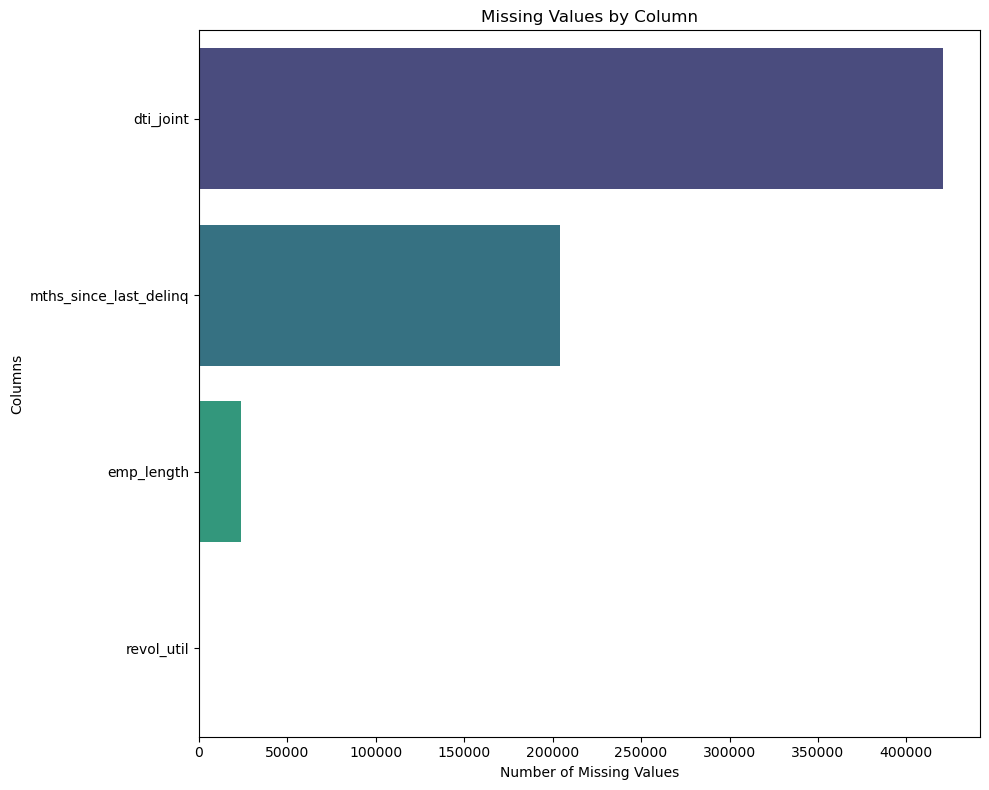

In [25]:
missing_values = data.isnull().sum()
missing_data = pd.DataFrame({'Missing Values': missing_values})
missing_data['Percentage'] = (missing_data['Missing Values'] / len(data)) * 100
missing_info = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(y=missing_info.index, x='Missing Values', data=missing_info, hue=missing_info.index,palette='viridis',legend=False)
plt.title('Missing Values by Column')
plt.ylabel('Columns')
plt.xlabel('Number of Missing Values')
plt.tight_layout()
plt.show()

**Missing data correlation heatmap using seaborn**

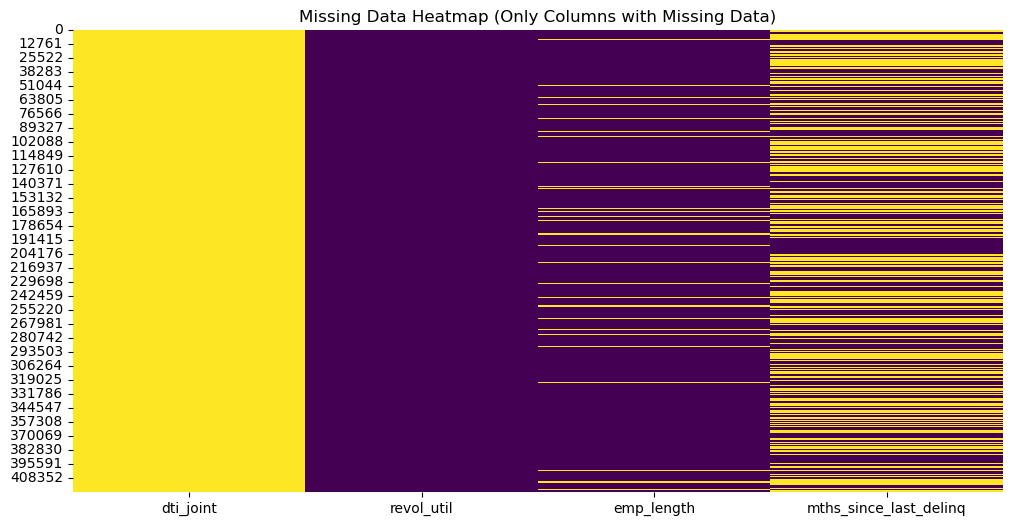

In [26]:
missing_columns = data.columns[data.isnull().any()]

# Plot the heatmap for missing data columns only
plt.figure(figsize=(12,6))
sns.heatmap(data[missing_columns].isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap (Only Columns with Missing Data)')
plt.show()

**Using Missingno to plot the missingness heatmap**

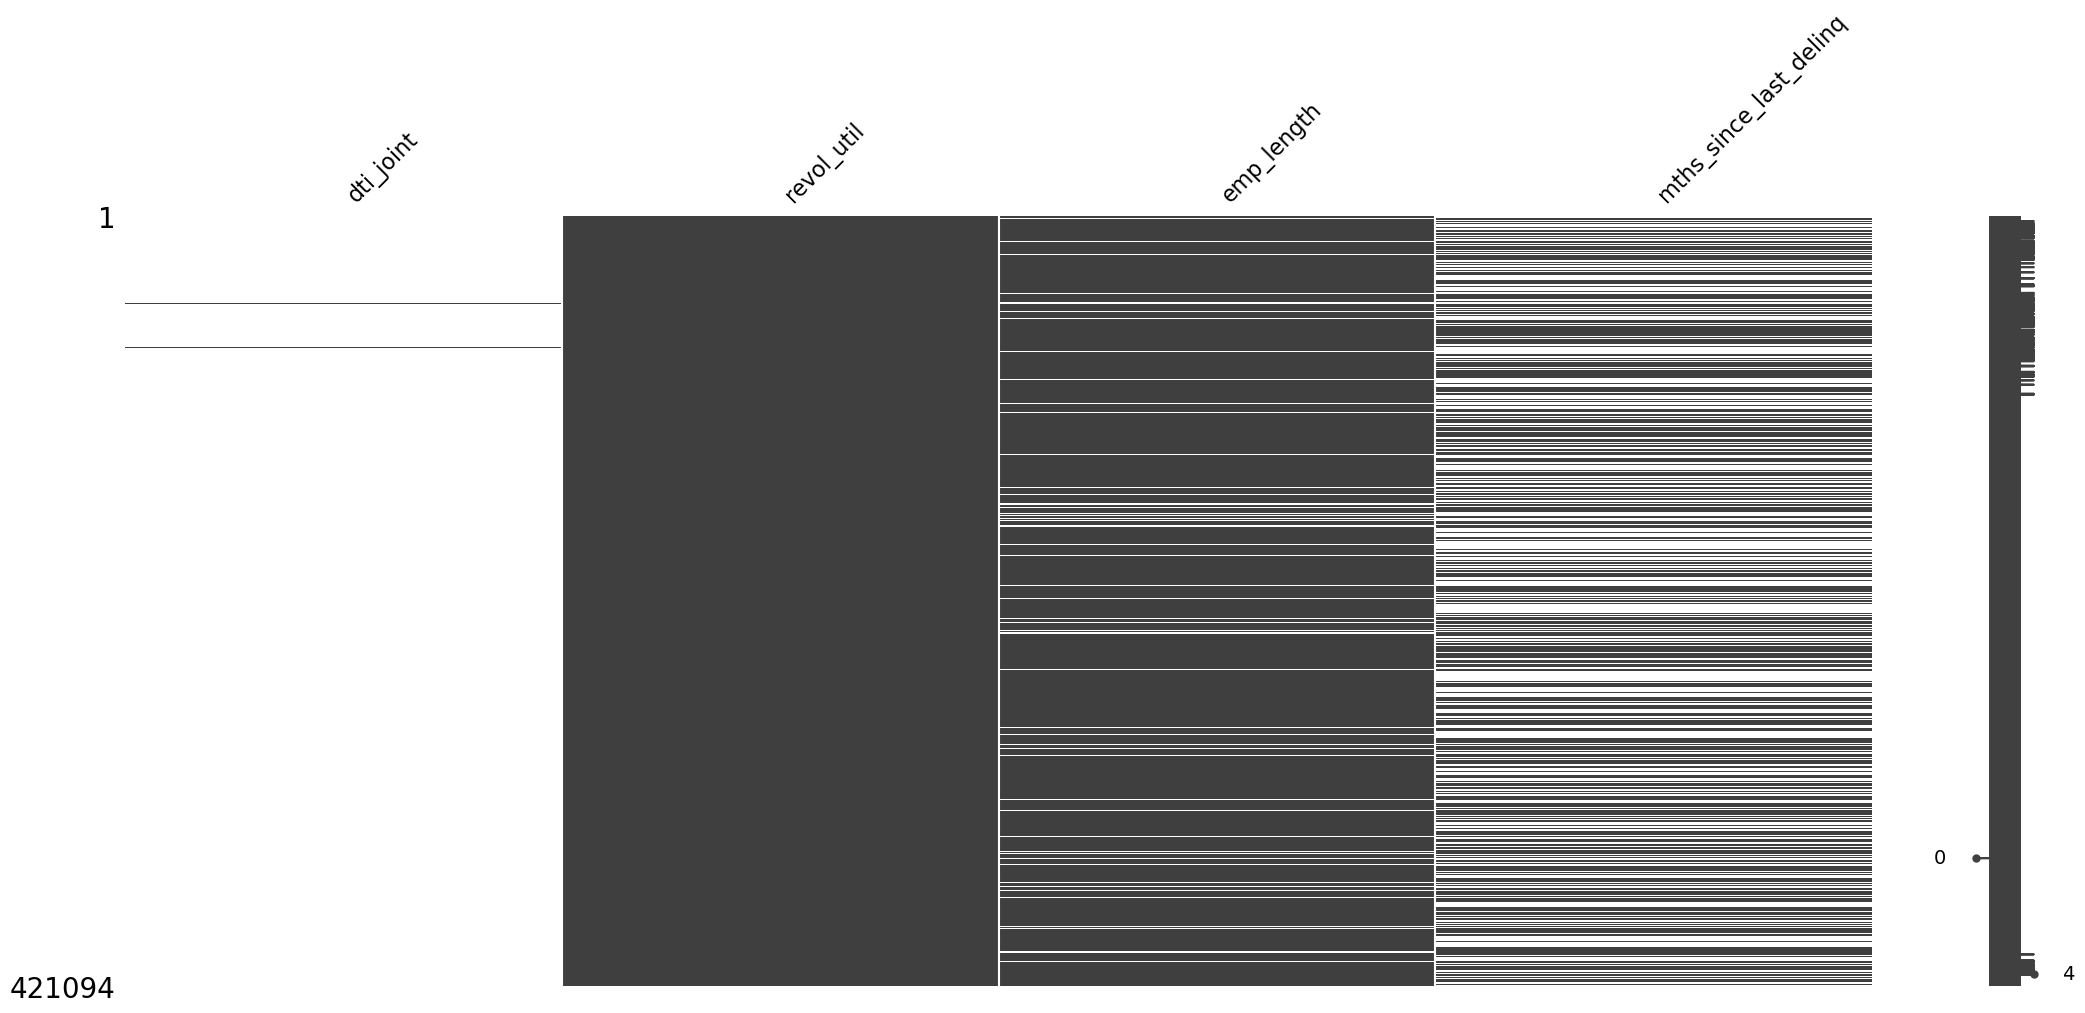

In [27]:
msno.matrix(data[missing_columns])
plt.show()

**Describing all the column parameters using .describe() and loading it in csv file**

In [28]:
# Summary statistics for numeric columns
# print("\nSummary Statistics:")
summary = data.describe(include='all')
summary.to_csv(r'D:/Foundations_of_DataScience/Projects/Mid_project/Dataset10/dataset_summary.csv')
# print(data.describe())

The initial data analysis and visualizations were successfully executed, 
In order to plot the missingness heatmap, I have used both seaborn and missingno libraries. When compared I found seaborn visualizations better than that of missingno. In order to have a simplified heatmap and to get the results faster, we can always use missingno library as it is designed to perform missing data analysis.

**Checking unique values of categorical columns and numerical columns**

In [29]:
# Checking categorical columns and their unique values
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].nunique()}")


Unique values in earliest_cr_line: 668
Unique values in verification_status: 3
Unique values in emp_length: 11
Unique values in home_ownership: 4
Unique values in pymnt_plan: 2
Unique values in grade: 7
Unique values in sub_grade: 35
Unique values in loan_status: 8
Unique values in purpose: 14
Unique values in addr_state: 49


In [30]:
numeric_cols = data.select_dtypes(include=['int','float']).columns
for col in numeric_cols:
    print(f"Unique values in {col}: {data[col].nunique()}")

Unique values in id: 421094
Unique values in loan_amnt: 1361
Unique values in funded_amnt: 1361
Unique values in revol_bal: 62072
Unique values in total_rev_hi_lim: 10694
Unique values in int_rate: 110
Unique values in installment: installment    40447
installment    40447
dtype: int64
Unique values in total_pymnt: 174159
Unique values in total_rec_late_fee: 812
Unique values in recoveries: 305
Unique values in last_pymnt_amnt: 67226
Unique values in out_prncp: 119580
Unique values in total_rec_prncp: 105390
Unique values in total_rec_int: 129439
Unique values in delinq_2yrs: 26
Unique values in inq_last_6mths: 7
Unique values in open_acc: 73
Unique values in total_acc: 126
Unique values in pub_rec: 28
Unique values in dti: 4086
Unique values in dti_joint: 449
Unique values in annual_inc: 26903
Unique values in revol_util: 1211
Unique values in installment: installment    40447
installment    40447
dtype: int64
Unique values in acc_now_delinq: 8
Unique values in mths_since_last_delinq:

**Handling Missing Data**

In [31]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])


Missing Values After Imputation:
0


**Creating new column risk from loan status**

In [32]:
data['loan_status'].value_counts()

loan_status
Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: count, dtype: int64

- The loan statuses from the analysis considered as non-risky:
    - Fully Paid : refers to the people who have already paid off the loan and are non-risky.
- The loan statuses from the analysis considered as risky:
    - Charged off : means the borrower has been deemed incapable of paying the loan and it will be marked under NPA(Non Performing Asset).
    - Default : means the borrower has not paid his/her loan even after 120 days.
    - Late (31-120 days) : means that the borrower has not paid the amount on time and there is a delay in payment of more than 31 days, this label comes under risky loan.
- The following loan statuses from the analysis are ignored as they could be risky or non-risky:
    - Current : refers to the current loan cycle, but there is a probability that they might default in future.
    - In Grace Period : means the borrower has delayed his payment by 1-15 days, this comes under non-risky loan, but if the borrower does not pay, it becomes risky. Since we cannot say whether the borrower will default or not with this status.
    - Late(16-30 days) : means that the borrower has delayed his payments by 16-30 days, this can also go both ways, so we ignore this as well.
    - Issued : refers to the loan has been issued just and the payment cycle has not begun, but there is a probability that the borrower may default in future.

In [33]:
mask = (data['loan_status'] != 'Current') & (data['loan_status'] != 'Issued') & (data['loan_status'] != 'Late (16-30 days)') & (data['loan_status'] != 'In Grace Period')
data = data[mask]
data['risk'] = np.where((data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Late (31-120 days)') | (data['loan_status'] == 'Default'), 1, 0)


In [35]:
data.drop('loan_status', axis=1, inplace=True)

KeyError: "['loan_status'] not found in axis"

**Univariate Analysis**

In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Make sure 'loan_amnt' is in numeric format; if not, convert it
data['loan_amnt'] = pd.to_numeric(data['loan_amnt'], errors='coerce')

# Create a histogram
histogram = go.Histogram(
    x=data['loan_amnt'],
    nbinsx=30,
    name='Loan Amount Distribution',
    opacity=0.75,
    marker=dict(color='blue'),
)

# Calculate the KDE
loan_amounts = data['loan_amnt'].dropna()
kde = gaussian_kde(loan_amounts)
x_kde = np.linspace(loan_amounts.min(), loan_amounts.max(), 100)
y_kde = kde(x_kde)

# Create a smoothing curve (KDE)
smoothing_curve = go.Scatter(
    x=x_kde,
    y=y_kde * (len(loan_amounts) * (x_kde[1] - x_kde[0])),  # Adjust the KDE to match the histogram
    mode='lines',
    name='Smoothing Curve (KDE)',
    line=dict(color='orange', width=2)
)

# Combine histogram and smoothing curve into a single figure
fig = go.Figure(data=[histogram, smoothing_curve])

# Update layout for better readability
fig.update_layout(
    title='Distribution of Loan Amounts with Smoothing Curve',
    xaxis_title='Loan Amount',
    yaxis_title='Count',
    template='plotly_white'
)

# Show the plot
fig.show()


### Distribution of Loan Amounts:

- The loan amounts are displayed in a range from 0 to 35,000.
- There is a **higher concentration of loans between 10k and 15k**. This is where the tallest bars in the histogram are located.
- The frequency of loans decreases after 15k, but there is a **noticeable peak again at around 35k**, indicating a smaller but significant number of large loans.
- Few loans are observed at the extreme lower and higher ranges (close to 0 and close to 35k).

### Smoothing Curve (KDE):

- The smoothing curve shows a more continuous representation of the data's distribution.

#### Loan Amount Clusters:
- The KDE reveals **several local peaks**. The **first major peak** occurs between 5k and 10k, indicating a higher probability of loans in this range.
- A **second, flatter peak** appears between 10k and 20k, consistent with the high count of loans in that range in the histogram.
- The **last peak** around 35k suggests a smaller but distinct group of high loan amounts.
- The KDE curve is smoother than the histogram and helps identify **underlying patterns** not immediately obvious in the bar chart.

### Interpretations:

- **Loan Trends:** Most loans are concentrated in the mid-range (10k–15k), with significant smaller clusters at both lower and higher ends (around 5k and 35k).
- **Bimodal Distribution:** There is a slight indication of a bimodal distribution, with one mode around 10k–15k and another smaller mode around 35k.
- **Outliers:** While there aren’t extreme outliers, the peaks in the KDE show distinct groupings in the loan amount data, which could reflect different loan types or borrower profiles.

In [37]:
# Ensure the 'int_rate' column is treated as string and handle NaN values
data['int_rate'] = data['int_rate'].astype(str).str.replace('%', '', regex=False).astype(float)

# Check for NaN values after conversion
interest_rates = data['int_rate'].dropna()

# Create a histogram
histogram = go.Histogram(
    x=interest_rates,
    nbinsx=30,
    name='Interest Rate Distribution',
    opacity=0.75,
    marker=dict(color='blue'),
)

# Calculate the KDE
kde = gaussian_kde(interest_rates)
x_kde = np.linspace(interest_rates.min(), interest_rates.max(), 100)
y_kde = kde(x_kde)

# Create a smoothing curve (KDE)
smoothing_curve = go.Scatter(
    x=x_kde,
    y=y_kde * (len(interest_rates) * (x_kde[1] - x_kde[0])),  # Adjust the KDE to match the histogram
    mode='lines',
    name='Smoothing Curve (KDE)',
    line=dict(color='orange', width=2)
)

# Combine histogram and smoothing curve into a single figure
fig = go.Figure(data=[histogram, smoothing_curve])

# Update layout for better readability
fig.update_layout(
    title='Distribution of Interest Rates with Smoothing Curve',
    xaxis_title='Interest Rate (%)',
    yaxis_title='Count',
    template='plotly_white'
)

# Show the plot
fig.show()

### Distribution of Interest Rates:

- The interest rates are displayed in a range from **0% to 30%**.
- There is a **higher concentration of interest rates between 5% and 10%**, which corresponds to the taller bars in the histogram.
- A **second major peak** appears between 10% and 15%, after which the frequency of interest rates decreases.
- There is a noticeable **smaller cluster of interest rates around 20%**, indicating a segment of loans with relatively higher interest rates.
- Few loans have interest rates at the extreme ends of the range (near 0% and beyond 20%).

### Smoothing Curve (KDE):

- The smoothing curve (KDE) offers a continuous visualization of the interest rate distribution.

#### Interest Rate Clusters:
- The **first major peak** in the KDE occurs around 5% to 7%, indicating a higher likelihood of loans in this range.
- A **second peak** appears between 10% and 12%, which aligns with the higher counts of loans in that range from the histogram.
- The **KDE flattens** after 15%, suggesting that the majority of loans have interest rates below this level, but there are small clusters around 20%.
- The KDE is useful for identifying **patterns** not immediately obvious in the histogram, such as slight variations within the higher rate ranges (15% and above).

### Interpretations:

- **Interest Rate Trends:** Most loans have interest rates between 5% and 15%, with two distinct clusters centered around **5%-7%** and **10%-12%**.
- **Skewed Distribution:** The distribution is **right-skewed**, meaning that while the majority of interest rates fall within a moderate range, a small but notable number of loans carry **higher interest rates** (15% and above).
- **Clusters of Higher Rates:** The KDE shows that even though the number of loans with interest rates above 15% is small, there is a distinct group of loans with interest rates around 20%, which may represent higher-risk loans or specific loan products.


### Conclusion
- The graphs provide valuable insights into the loan amounts and interest rates in the dataset. 
- The distributions reveal important trends regarding borrower behavior, lending practices, and potential risks associated with larger loans and higher interest rates.

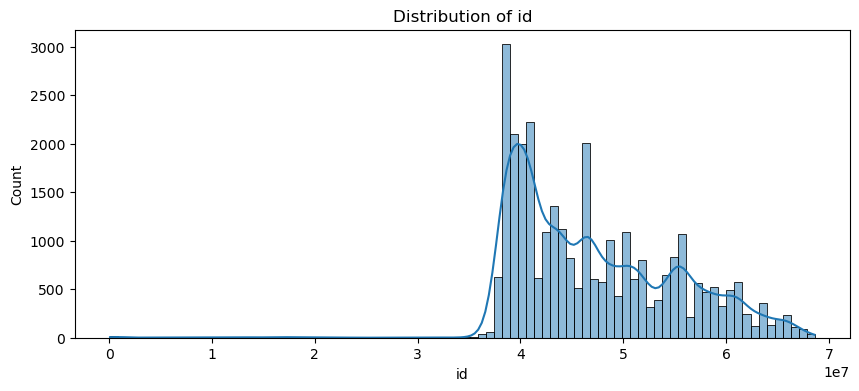

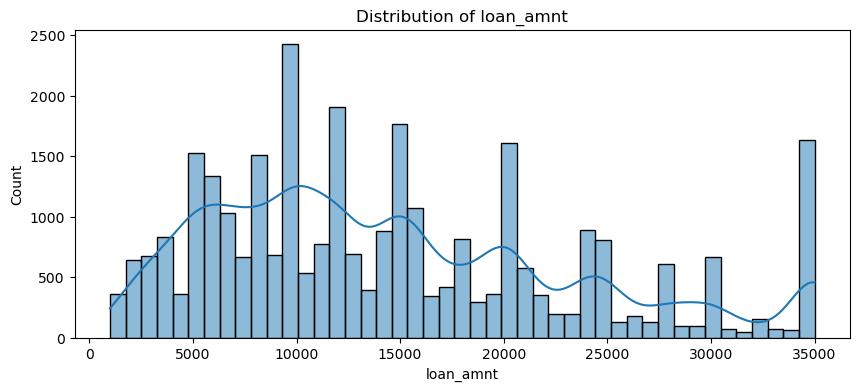

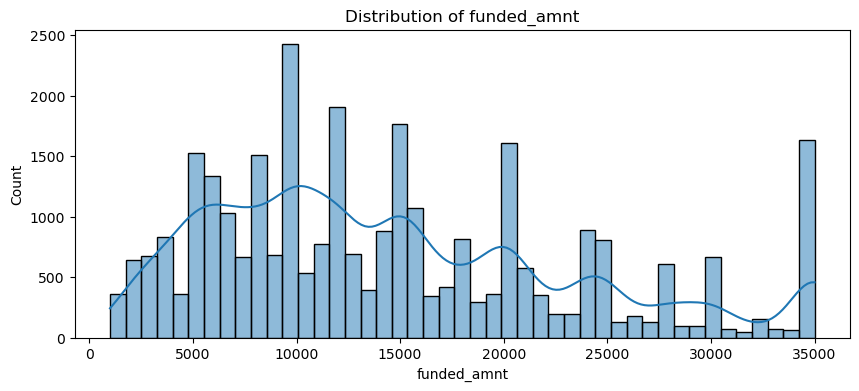

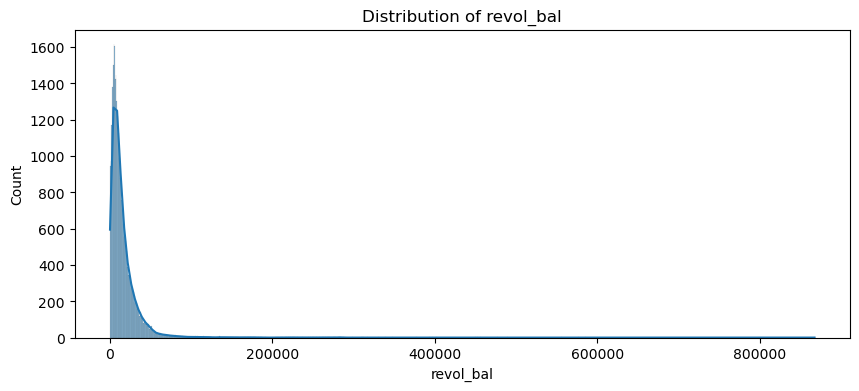

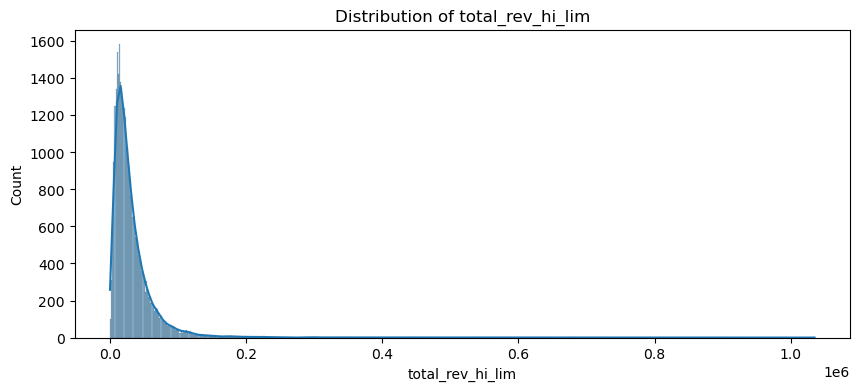

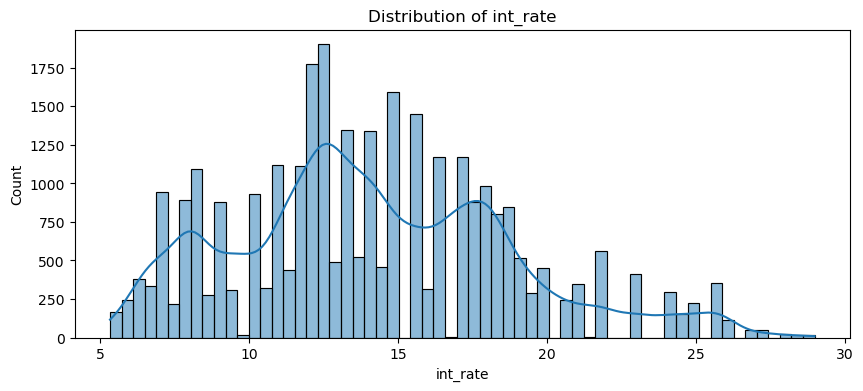

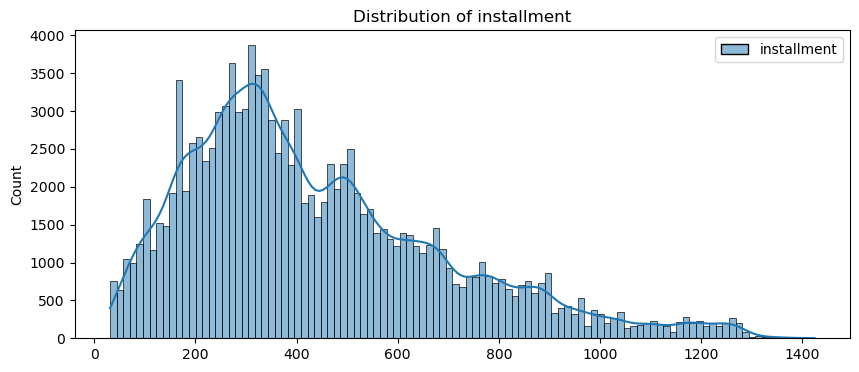

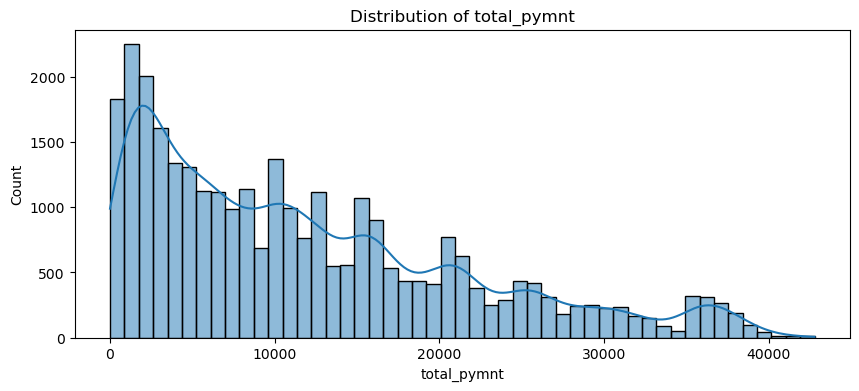

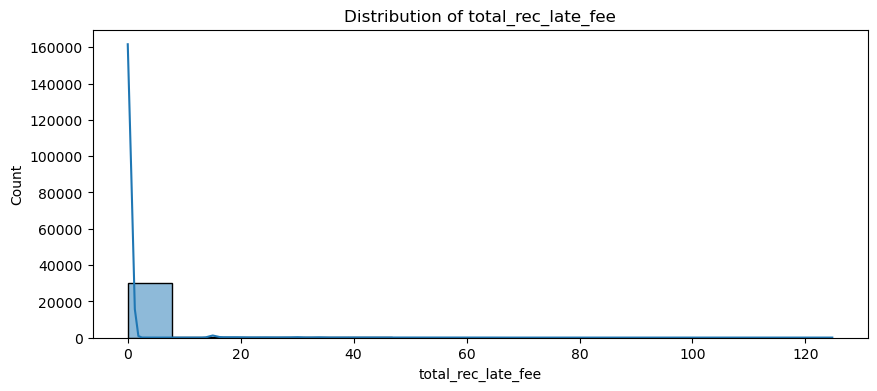

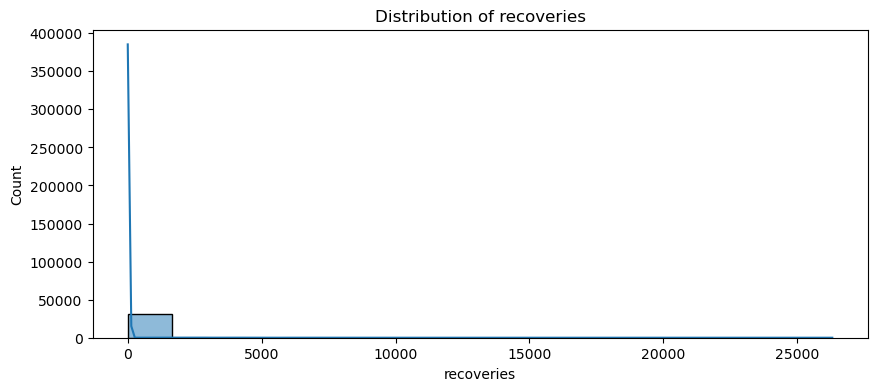

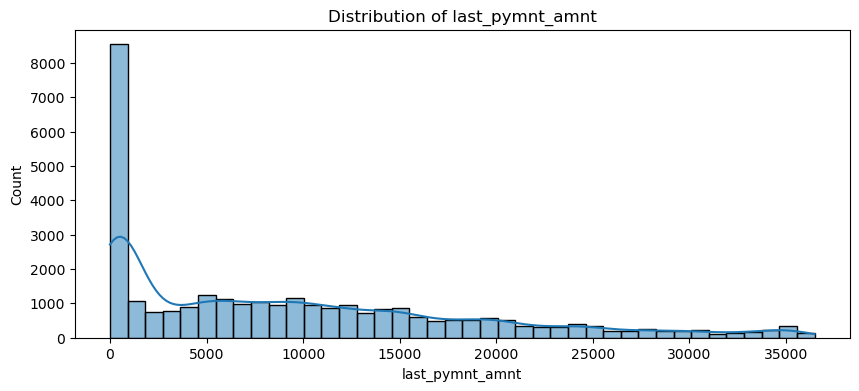

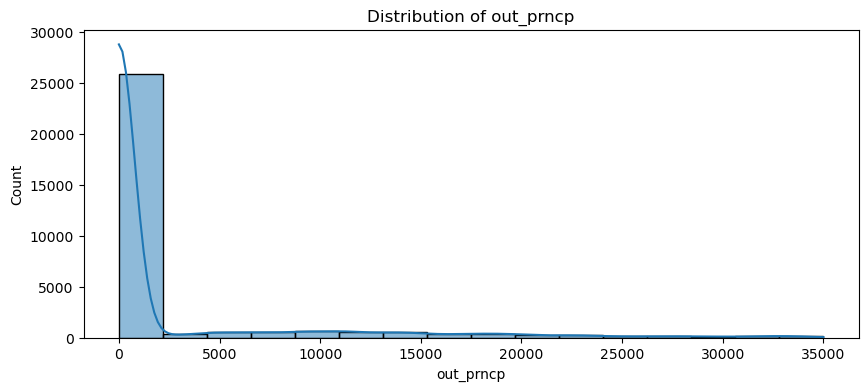

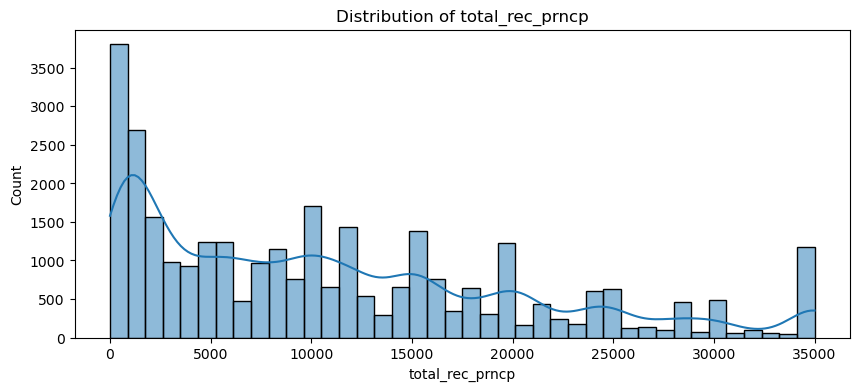

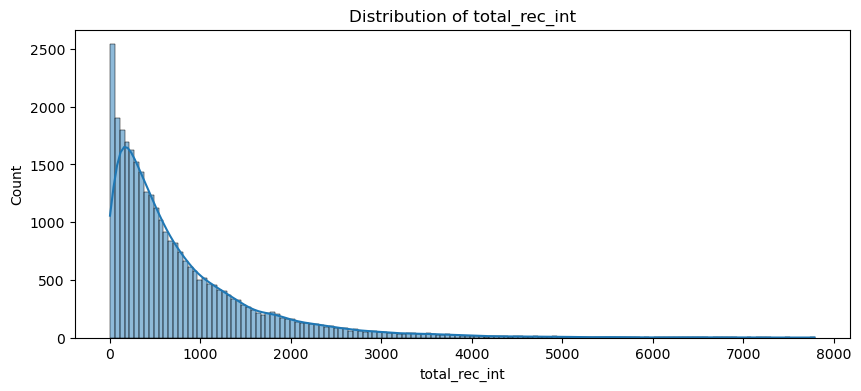

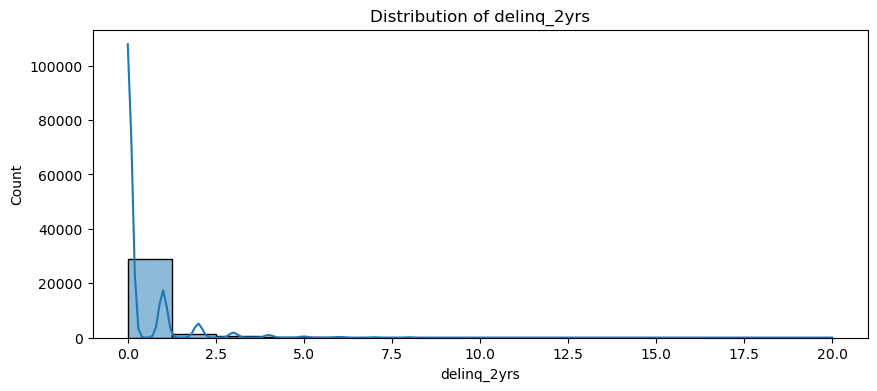

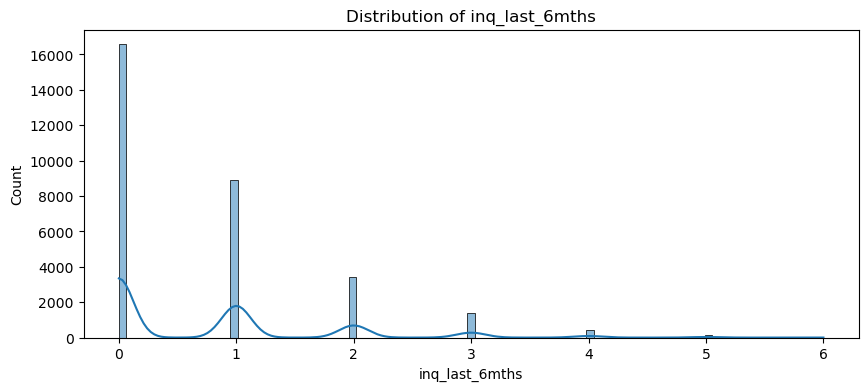

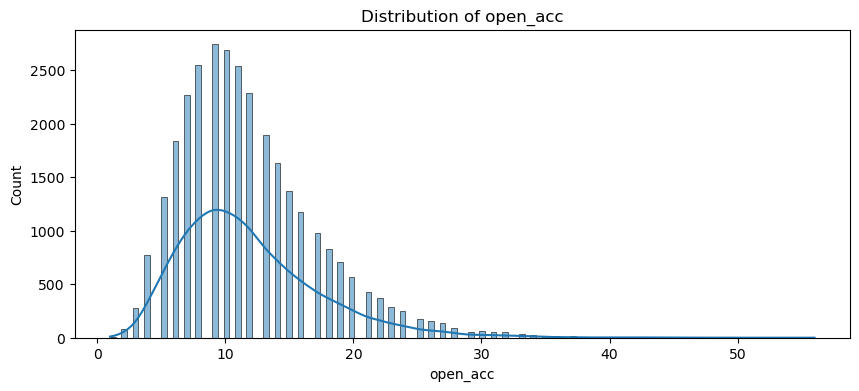

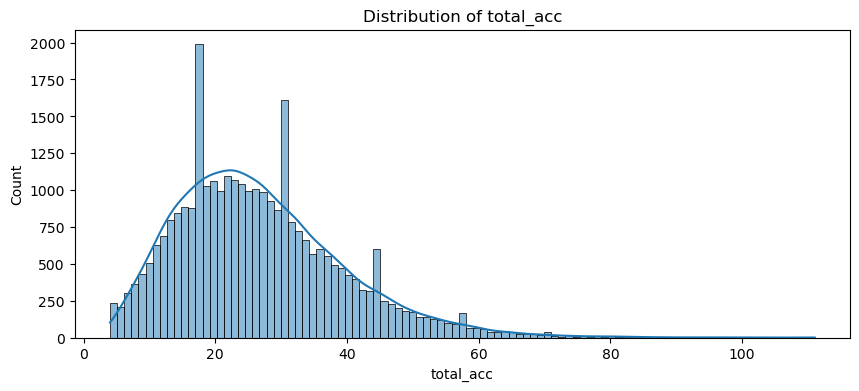

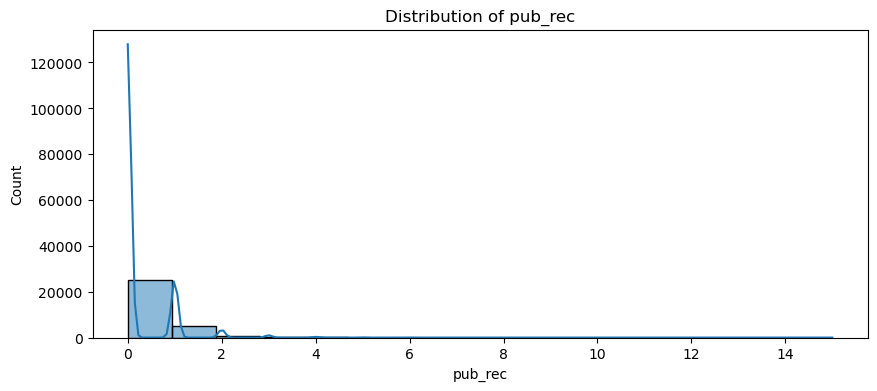

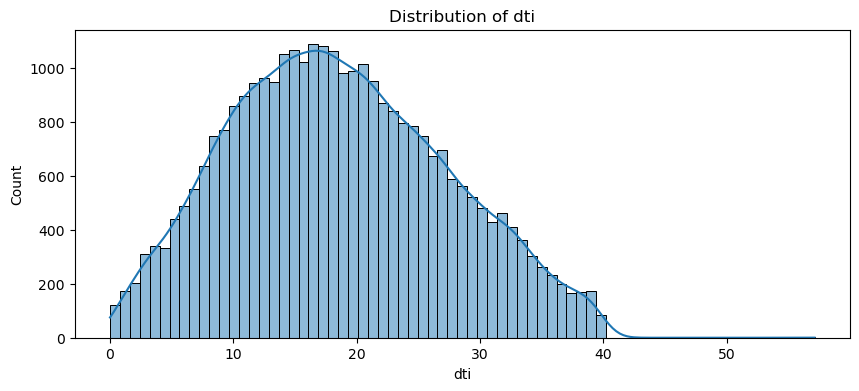

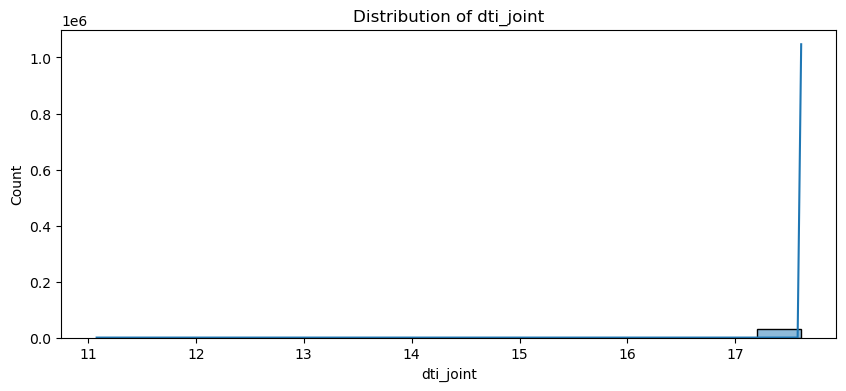

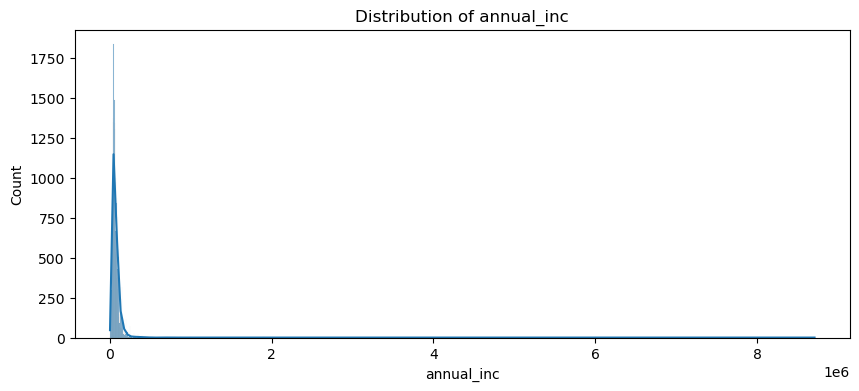

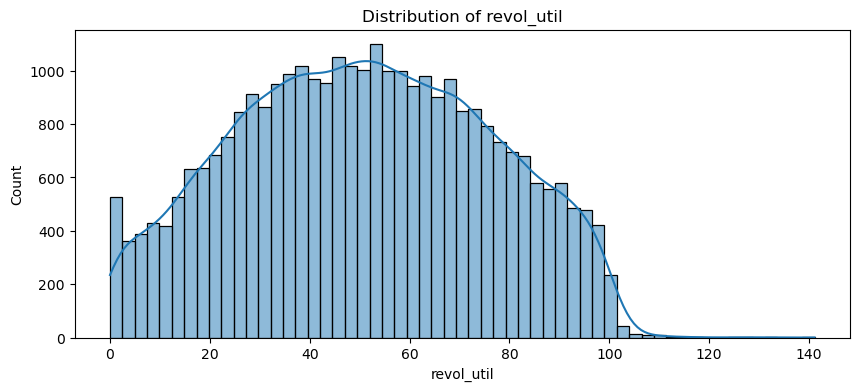

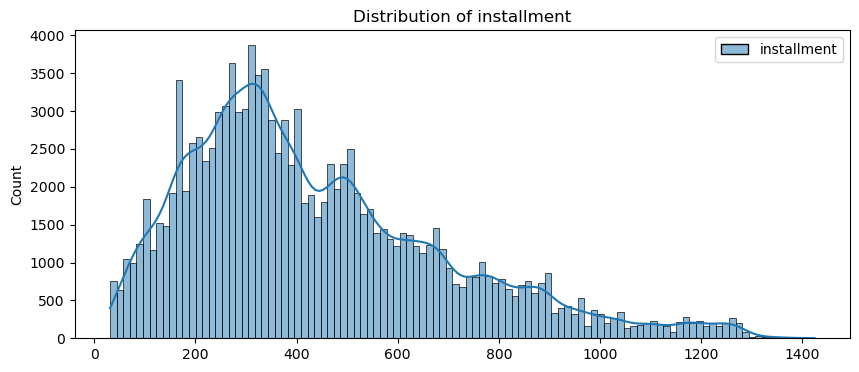

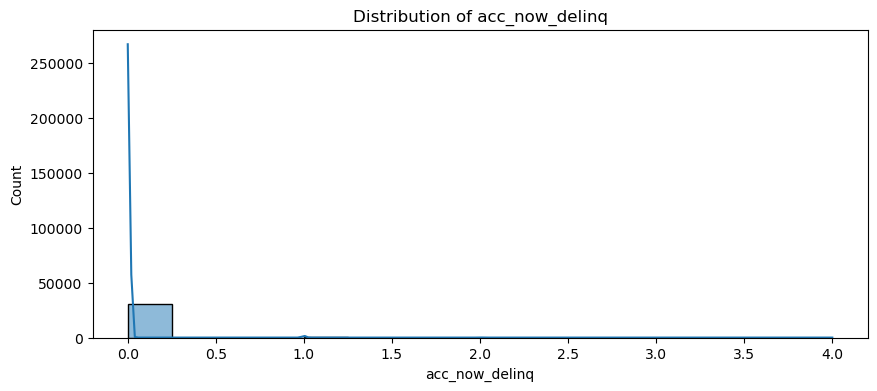

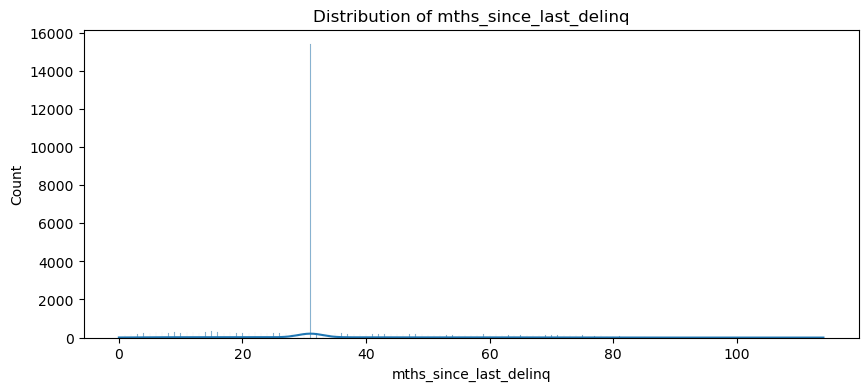

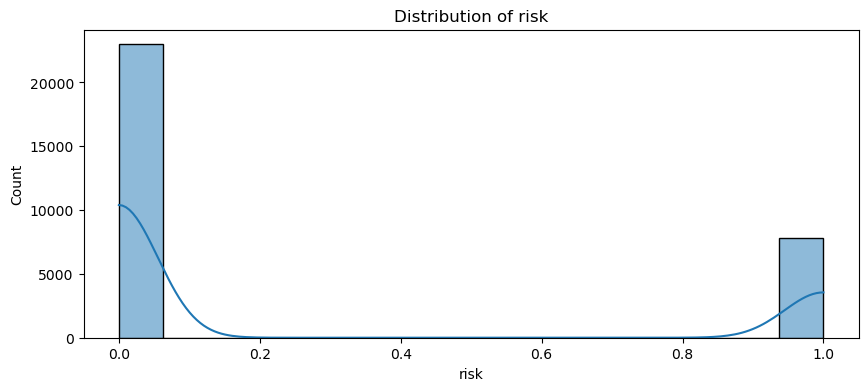

In [38]:
data = data.reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Get numeric columns from the dataset
numerical_cols = data.select_dtypes(include='number').columns.tolist()


for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Summary of Distributions for Numeric Columns

## Loan Amount (`loan_amnt`):
- **Distribution**: The distribution is typically right-skewed, indicating that while most loans are on the lower end, there are a few high-value loans that skew the average.
- **Central Tendency**: The mean is higher than the median, which suggests a few high-value outliers.
- **Spread**: A significant range with a concentration of values around the lower amounts.

## Interest Rate (`int_rate`):
- **Distribution**: The interest rate distribution is often bimodal or unimodal, with peaks around common interest rates.
- **Central Tendency**: The mean and median are relatively close, indicating fewer extreme outliers.
- **Spread**: Concentration around lower rates, with a tapering off towards higher rates.

## Installment Amount (`installment`):
- **Distribution**: This might show a normal or slightly skewed distribution, depending on the loan amounts and terms.
- **Central Tendency**: Similar mean and median suggest a balanced distribution.
- **Spread**: Most values cluster around a certain range, indicating common installment payments.

## Total Payment (`total_pymnt`):
- **Distribution**: Typically right-skewed, as it aggregates payments over time.
- **Central Tendency**: Mean higher than the median due to high total payments for long-term loans.
- **Spread**: Wide range due to varying loan amounts and repayment terms.

## Outstanding Principal (`out_prncp`):
- **Distribution**: Generally right-skewed, especially if there are many active loans.
- **Central Tendency**: Mean may be higher due to loans that have not yet been paid down.
- **Spread**: High values indicate a few loans with significant balances.

## Delinquencies in Last 2 Years (`delinq_2yrs`):
- **Distribution**: Often bimodal or concentrated around zero, indicating that many borrowers have no delinquencies.
- **Central Tendency**: The median might be lower than the mean, suggesting that a small number of borrowers have multiple delinquencies.
- **Spread**: Most values are 0, with few higher values.

## Debt-to-Income Ratio (`dti`):
- **Distribution**: May show a normal distribution with a slight right skew.
- **Central Tendency**: The mean and median are close, suggesting most borrowers fall within a standard range.
- **Spread**: Values clustered around the average DTI.

## Annual Income (`annual_inc`):
- **Distribution**: Typically right-skewed, as income tends to have a few high earners.
- **Central Tendency**: Mean higher than median due to high-income outliers.
- **Spread**: Concentration around middle-income levels, with few high-income outliers.

## General Observations:
- **Skewness**: Most numeric columns show right skewness, suggesting that there are outliers on the high end of the scale.
- **Central Tendency**: The mean often exceeds the median, indicating that higher values significantly impact the average.
- **Variability**: There is considerable variability in the loan-related features, indicating diverse financial profiles among borrowers.
- **Potential Outliers**: Several columns indicate the presence of outliers, which could influence statistical analyses and should be addressed if conducting further modeling or analysis.

## Conclusion
The distributions of the numeric columns provide insight into borrower behavior and financial status. Understanding these distributions is crucial for predicting creditworthiness and assessing risk in lending decisions.


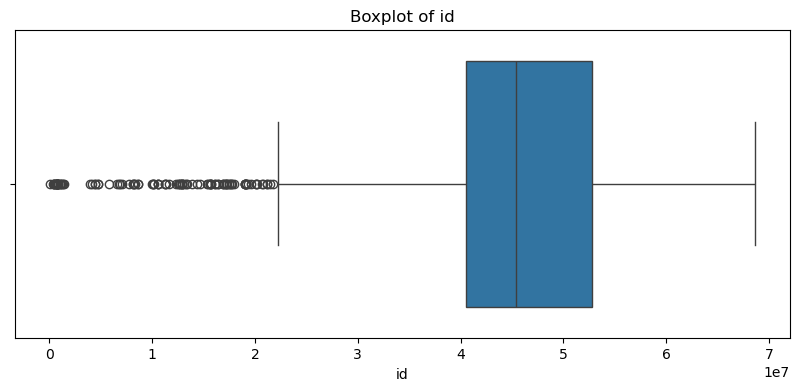

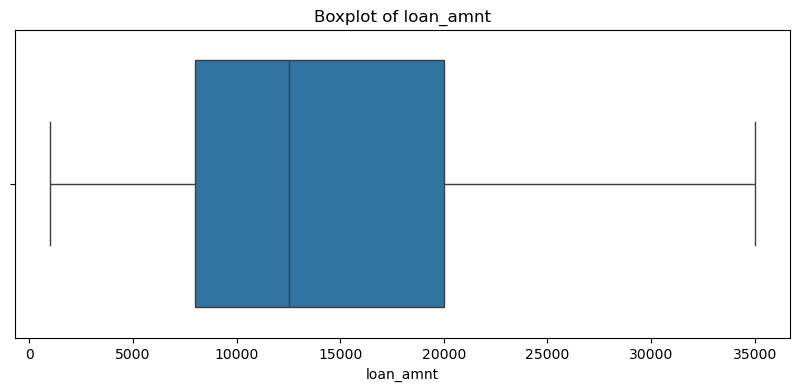

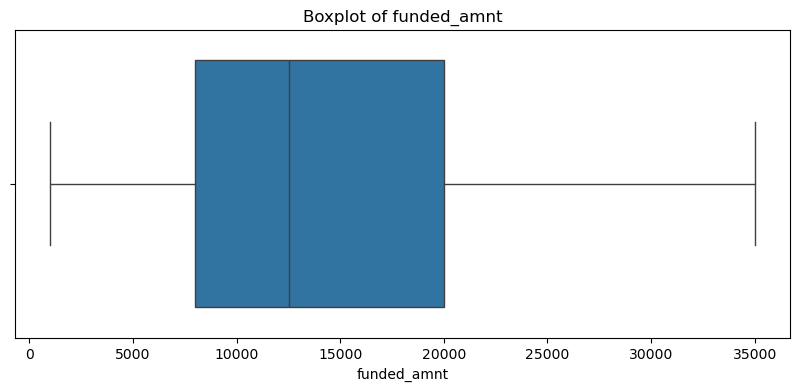

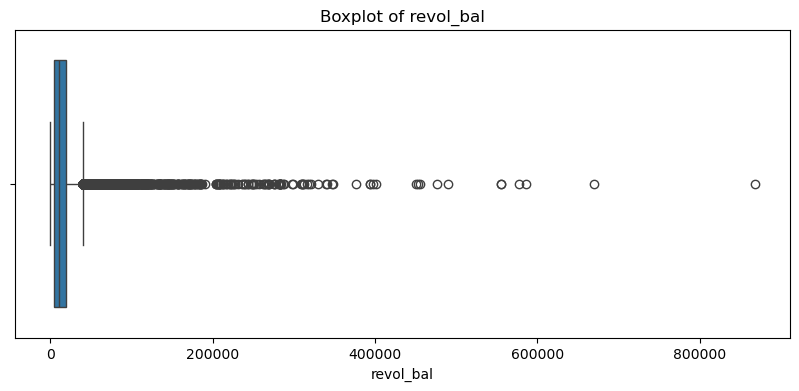

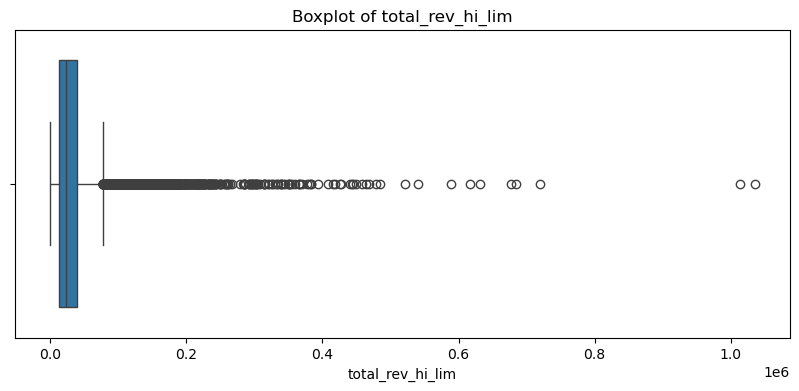

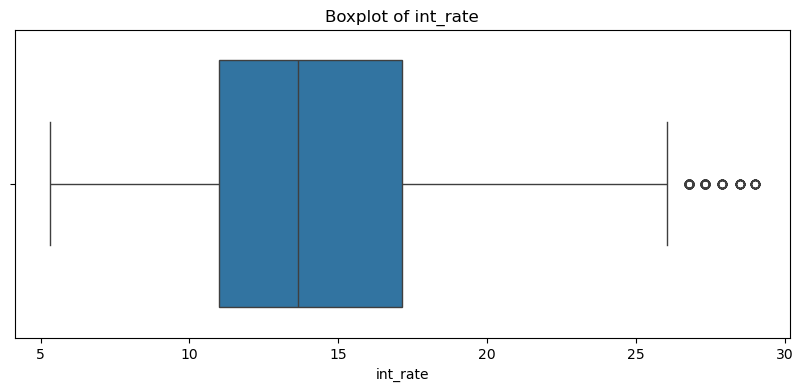

ValueError: If using all scalar values, you must pass an index

<Figure size 1000x400 with 0 Axes>

In [39]:

# Boxplots to check outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()  

# Summary of Box Plots for Numeric Columns

## Loan Amount (`loan_amnt`):
- **Outliers**: The box plot shows several outliers on the high end, indicating a few borrowers took significantly larger loans compared to the majority. These outliers could skew analysis and should be further investigated.
- **Interquartile Range (IQR)**: The bulk of loans are concentrated in a lower range, with the median indicating a typical loan amount below the average due to the influence of outliers.

## Interest Rate (`int_rate`):
- **Outliers**: There are a few outliers on both the low and high ends, suggesting a range of interest rates available to borrowers. High outliers may represent risky loans or specific borrower situations.
- **Distribution**: The median interest rate is positioned closer to the lower quartile, indicating that many loans are offered at relatively lower rates.

## Installment Amount (`installment`):
- **Outliers**: The box plot displays several outliers, primarily on the higher end. This suggests that some borrowers have higher installment payments, potentially due to larger loan amounts or longer terms.
- **Central Tendency**: The median installment amount is significantly lower than the mean, indicating that a few high installments are skewing the average.

## Total Payment (`total_pymnt`):
- **Outliers**: Numerous high outliers are observed, likely due to borrowers who have made significant payments over time, either due to long-term loans or early repayment.
- **Implication**: This indicates variability in repayment behavior and suggests that some borrowers may be better at managing their loans than others.

## Outstanding Principal (`out_prncp`):
- **Outliers**: There are outliers on the high end, indicating a small number of loans that have significant outstanding balances. These could represent loans that are new or have not been paid down significantly.
- **Financial Risk**: High outstanding principal balances may indicate financial risk, particularly if coupled with delinquencies.

## Delinquencies in Last 2 Years (`delinq_2yrs`):
- **Outliers**: The box plot shows a concentration of values at zero, with a few outliers indicating borrowers who have experienced multiple delinquencies.
- **Risk Assessment**: The presence of outliers suggests that while many borrowers are responsible, a small subset poses a higher risk due to their repayment behavior.

## Debt-to-Income Ratio (`dti`):
- **Outliers**: A few high outliers indicate that some borrowers may have a very high debt-to-income ratio, which could signify financial strain.
- **Normal Range**: Most values cluster around a lower range, indicating that many borrowers maintain a manageable debt load relative to their income.

## Annual Income (`annual_inc`):
- **Outliers**: The box plot shows several high outliers, suggesting that a few borrowers earn significantly more than the majority. This may impact loan approval and terms.
- **Implication**: High-income borrowers might be less risky from a lending perspective, but their presence could skew average income figures.

## General Observations:
- **Presence of Outliers**: Many numeric columns display outliers, especially in loan-related features, which can significantly affect statistical analyses and model performance.
- **Skewed Distributions**: The box plots indicate that several distributions are skewed, particularly those related to loan amounts and payments, which might reflect real-world borrowing behaviors.
- **Impact on Analysis**: Outliers may need to be handled carefully in any further analyses, possibly through techniques such as trimming, winsorizing, or robust statistical methods.

## Conclusion
Box plots provide valuable insights into the spread and central tendencies of the numeric columns in your dataset. Understanding the presence and impact of outliers is crucial for making informed decisions in lending practices and credit assessments.


In [7]:

# Univariate analysis for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

NameError: name 'categorical_cols' is not defined

# Summary of Categorical Variable Distributions

## General Observations:
- **Categorical Variables**: Categorical variables provide insights into borrower characteristics and loan application statuses. The distribution of these variables can highlight trends and patterns relevant to credit risk assessment and decision-making in lending.

## Key Categorical Variables:

### 1. **Home Ownership (`home_ownership`)**:
- **Distribution**: The count plot reveals the proportions of borrowers who own homes, rent, or have other living arrangements.
- **Inference**: Homeownership can be a strong indicator of stability and financial responsibility. A higher percentage of homeowners may suggest a more reliable borrower base, as homeownership often correlates with long-term financial commitment.

### 2. **Loan Purpose (`purpose`)**:
- **Distribution**: The plot illustrates the various reasons for loan applications, such as debt consolidation, home improvement, and education.
- **Inference**: Understanding loan purpose helps in assessing risk. For example, loans for debt consolidation may carry different risks compared to loans for home improvement. A significant number of loans for a specific purpose may indicate borrower preferences or economic trends.

### 3. **Income Verification Status (`verification_status`)**:
- **Distribution**: This variable indicates whether borrowers have verified their income, with categories such as "Verified," "Not Verified," and "Source Verified."
- **Inference**: A higher number of verified incomes can reduce lending risk, as it provides lenders with assurance about the borrower’s financial capacity. A significant number of unverified incomes may suggest an increased risk level.

### 4. **Employment Length (`emp_length`)**:
- **Distribution**: The count plot displays the distribution of borrowers based on their employment duration, indicating how many borrowers fall into different employment categories (e.g., 0-5 years, 5-10 years, etc.).
- **Inference**: Longer employment duration generally correlates with financial stability and may lead to lower default rates. A higher number of borrowers in the lower employment categories could indicate increased risk.

### 5. **Verification Status Joint (`verification_status_joint`)** (if applicable):
- **Distribution**: Shows if the income was verified jointly for borrowers applying together.
- **Inference**: Joint applications may signify shared financial responsibility, potentially lowering the risk. A high proportion of joint applications could indicate financial collaboration among borrowers.

### 6. **Loan Status (`loan_status`)**:
- **Distribution**: Reflects the current status of loans, such as "Fully Paid," "Current," "Charged Off," etc.
- **Inference**: Analyzing the distribution of loan statuses can provide insights into repayment behaviors and trends in default rates. A higher proportion of "Charged Off" loans may highlight risk areas for the lending institution.

## Conclusion:
The count plots of categorical variables provide valuable insights into borrower demographics, loan purposes, and verification statuses. Understanding these distributions is essential for identifying trends, assessing risks, and making informed lending decisions. Each categorical variable contributes to a more comprehensive view of the dataset, aiding in the evaluation of creditworthiness and loan performance.


**Bivariate/Multivariate Analysis (Correlation & Scatter Plots)**

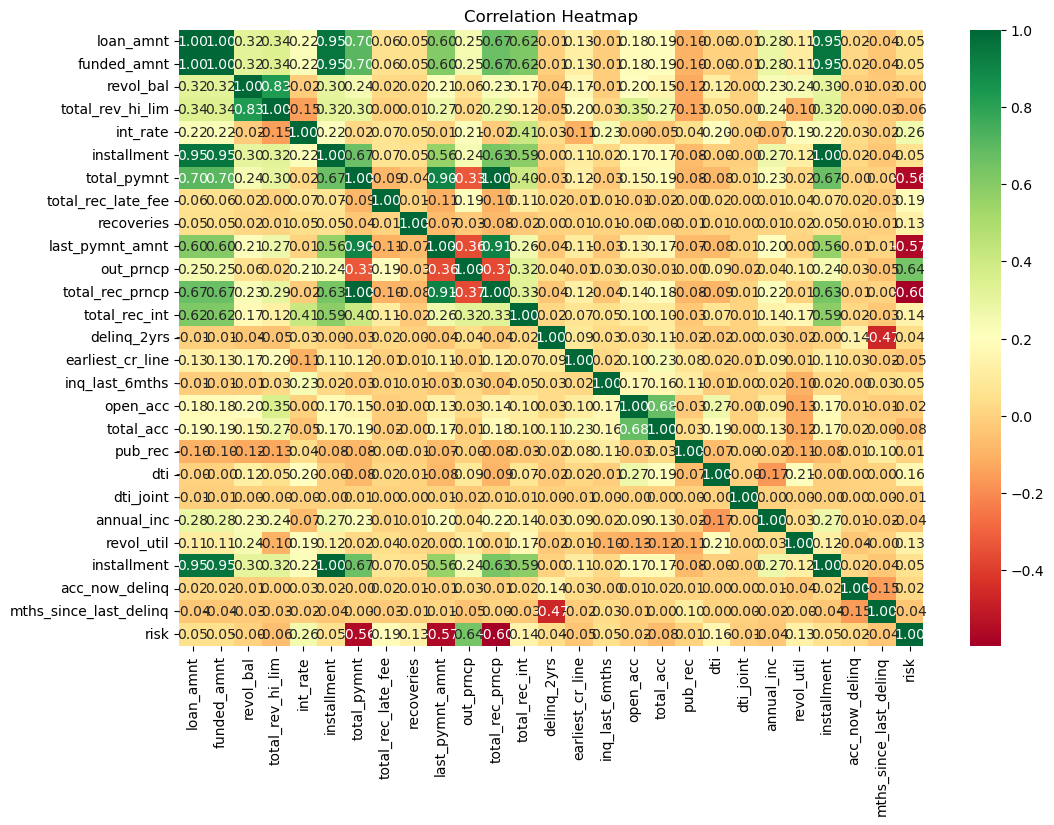

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert date columns to datetime format (if applicable)
date_cols = ['earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d']  # Add more date columns if needed
for col in date_cols:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Step 2: Drop non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number', 'datetime']).copy()

# Step 3: Remove the 'id' column if it exists
if 'id' in numeric_data.columns:
    numeric_data.drop(columns=['id'], inplace=True)

# Optionally convert datetime columns to a numeric format if needed
for col in numeric_data.columns:
    if pd.api.types.is_datetime64_any_dtype(numeric_data[col]):
        numeric_data[col] = numeric_data[col].astype('int64') // 10**9  # Convert to seconds since epoch

# Step 4: Compute correlation matrix
correlation = numeric_data.corr()
custom_palette = sns.color_palette("RdYlGn", as_cmap=True)
# Step 5: Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap=custom_palette, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [42]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'revol_bal', 'total_rev_hi_lim',
       'int_rate', 'installment', 'total_pymnt', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'out_prncp', 'total_rec_prncp',
       'total_rec_int', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'total_acc', 'pub_rec', 'dti', 'dti_joint', 'annual_inc',
       'verification_status', 'revol_util', 'emp_length', 'home_ownership',
       'pymnt_plan', 'installment', 'grade', 'sub_grade', 'purpose',
       'acc_now_delinq', 'mths_since_last_delinq', 'addr_state', 'risk'],
      dtype='object')

**Scatter Plots for Bivariate Analysis**

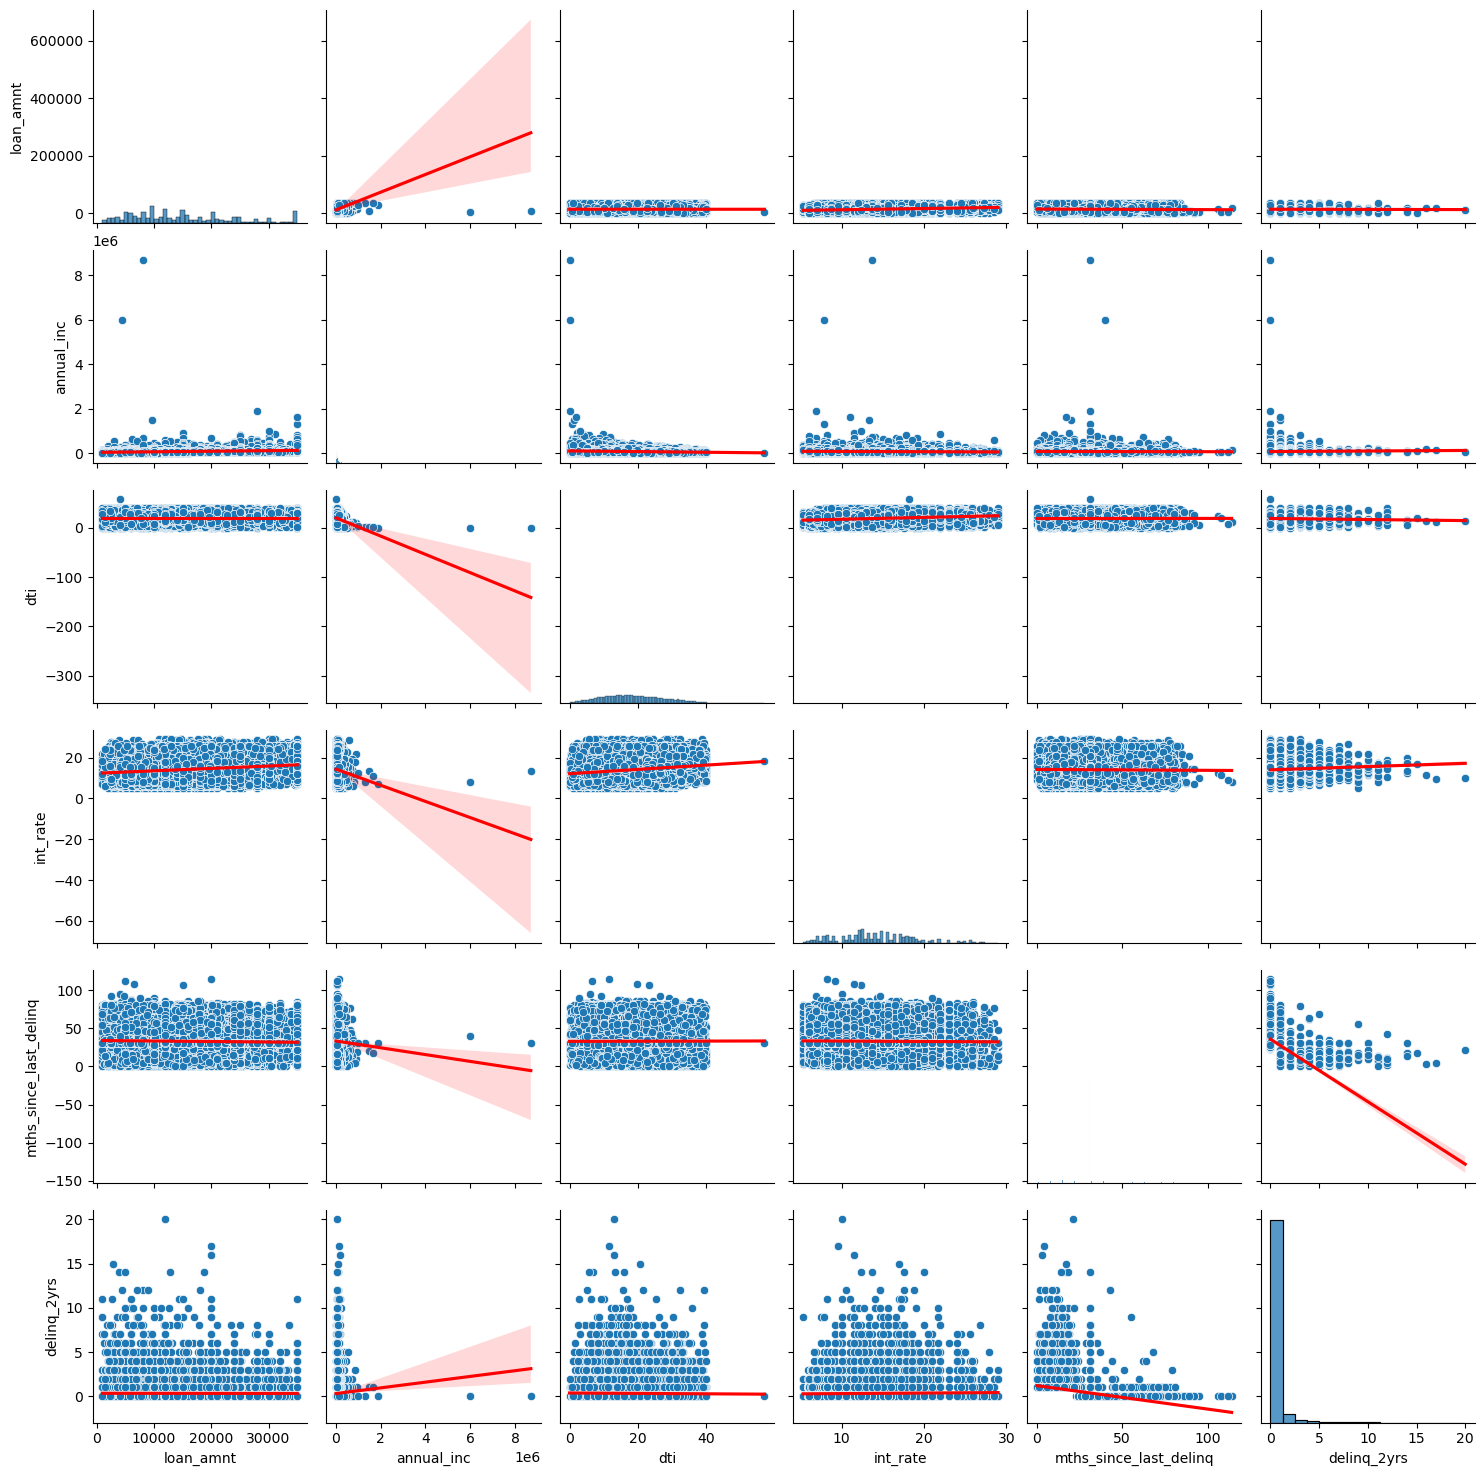

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter relevant columns for analysis
pair_columns = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'grade', 'sub_grade', 'purpose', 'mths_since_last_delinq', 'delinq_2yrs','risk']

# Create pairplot and add regression lines for selected pairs
g = sns.pairplot(data[pair_columns])

# For each pair in the grid, draw the regression line
for ax in g.axes.flatten():
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    if x_var in data.columns and y_var in data.columns and data[x_var].dtype in [int, float] and data[y_var].dtype in [int, float]:
        sns.regplot(x=x_var, y=y_var, data=data, ax=ax, scatter=False, color='r')

plt.show()


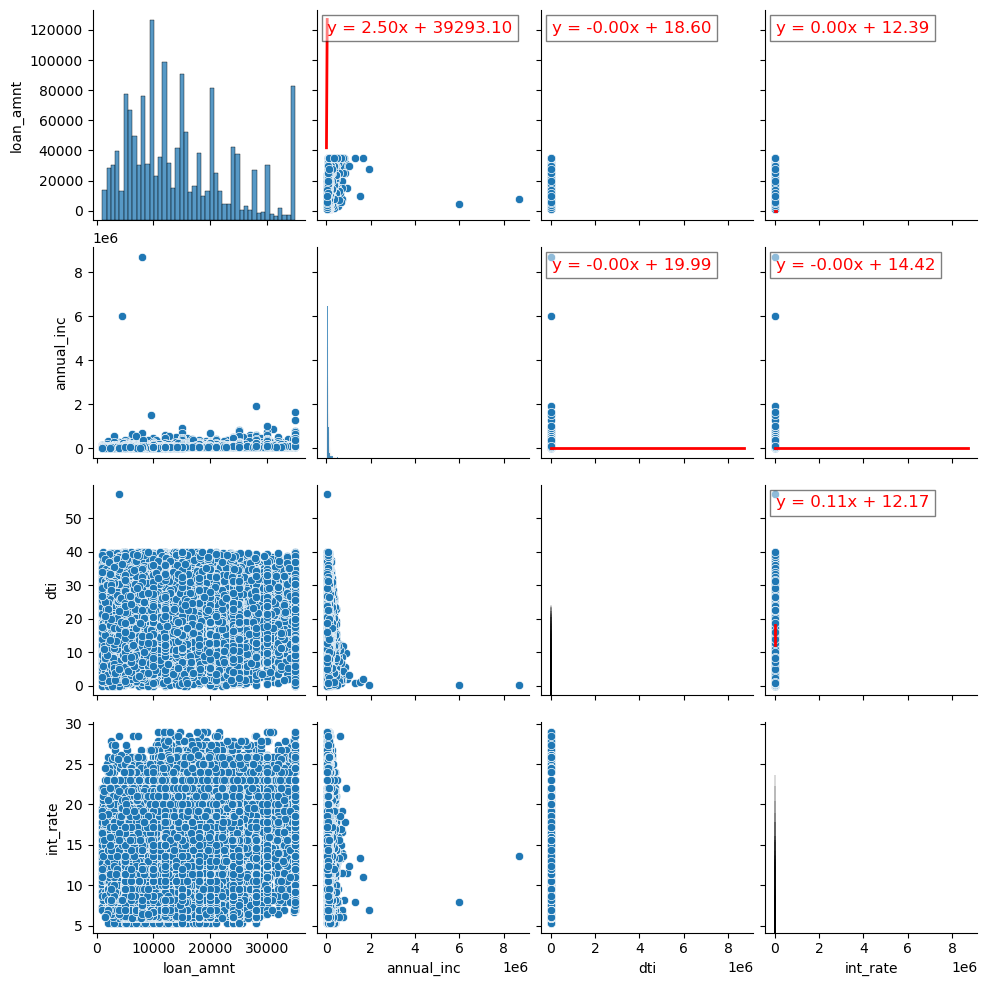

loan_amnt vs annual_inc: Slope = 2.50, Intercept = 39293.10, Equation = y = 2.50x + 39293.10
loan_amnt vs dti: Slope = -0.00, Intercept = 18.60, Equation = y = -0.00x + 18.60
loan_amnt vs int_rate: Slope = 0.00, Intercept = 12.39, Equation = y = 0.00x + 12.39
annual_inc vs dti: Slope = -0.00, Intercept = 19.99, Equation = y = -0.00x + 19.99
annual_inc vs int_rate: Slope = -0.00, Intercept = 14.42, Equation = y = -0.00x + 14.42
dti vs int_rate: Slope = 0.11, Intercept = 12.17, Equation = y = 0.11x + 12.17


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
# data = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace with your dataset path

# Specify the columns of interest for the pair plot
pair_columns = ['loan_amnt', 'annual_inc', 'dti', 'int_rate']

# Create pairplot and add regression lines for selected pairs
g = sns.pairplot(data[pair_columns])

# Dictionary to store slope and intercept values
regression_results = {}

# For each pair in the grid, draw the regression line and get slope and intercept
for i, x_var in enumerate(pair_columns):
    for j, y_var in enumerate(pair_columns):
        if i < j:  # To avoid repeating pairs and self-comparisons
            # Perform linear regression
            x_data = data[x_var].dropna()
            y_data = data[y_var].dropna()
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
            
            # Add the regression line to the plot
            ax = g.axes[i, j]
            x_range = np.linspace(x_data.min(), x_data.max(), 100)
            y_range = slope * x_range + intercept
            
            ax.plot(x_range, y_range, color='red', linewidth=2)
            
            # Store results
            regression_results[f'{x_var} vs {y_var}'] = {
                'slope': slope,
                'intercept': intercept
            }
            
            # Annotate the plot with the regression equation
            equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
            ax.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=12,
                    verticalalignment='top', color='red', bbox=dict(facecolor='white', alpha=0.5))

# Show the pair plot with regression lines
plt.show()

# Print regression results
for pair, result in regression_results.items():
    print(f"{pair}: Slope = {result['slope']:.2f}, Intercept = {result['intercept']:.2f}, Equation = y = {result['slope']:.2f}x + {result['intercept']:.2f}")


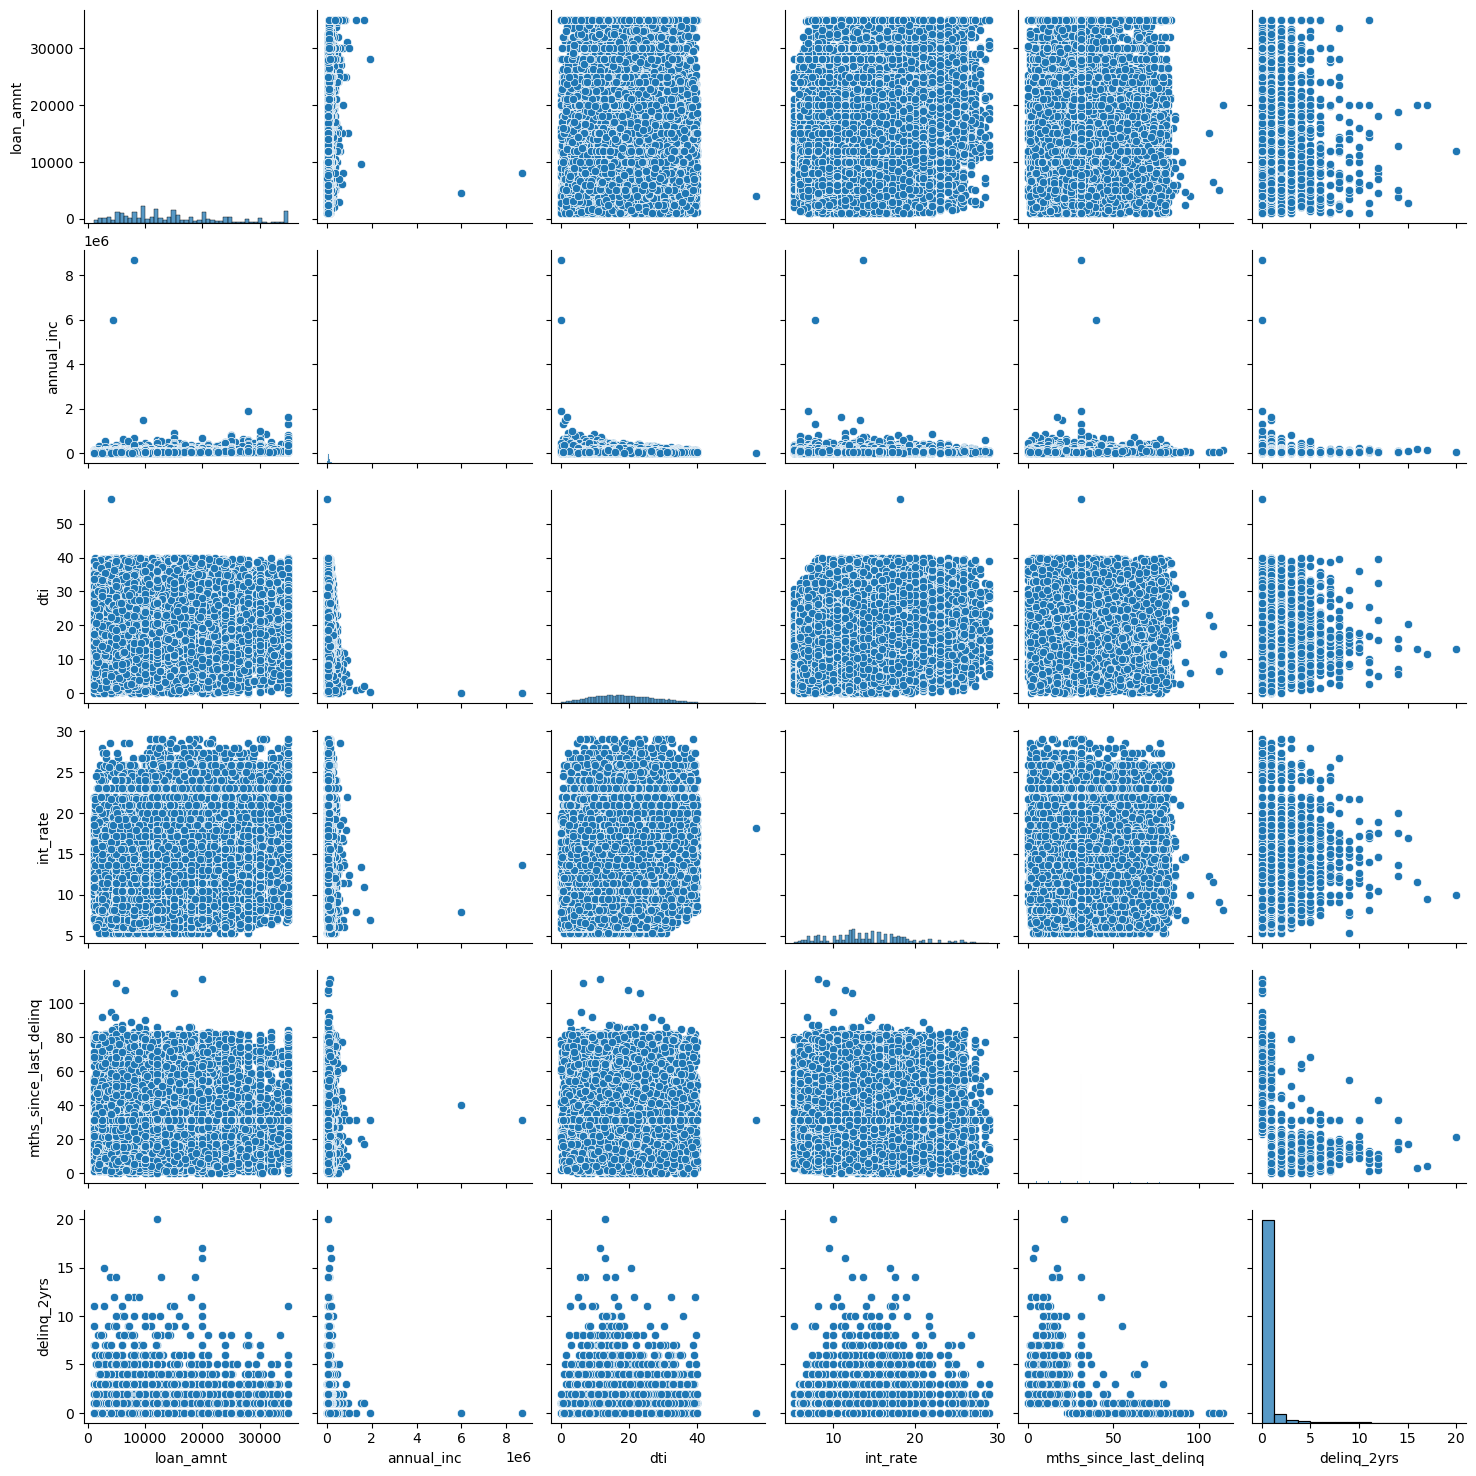

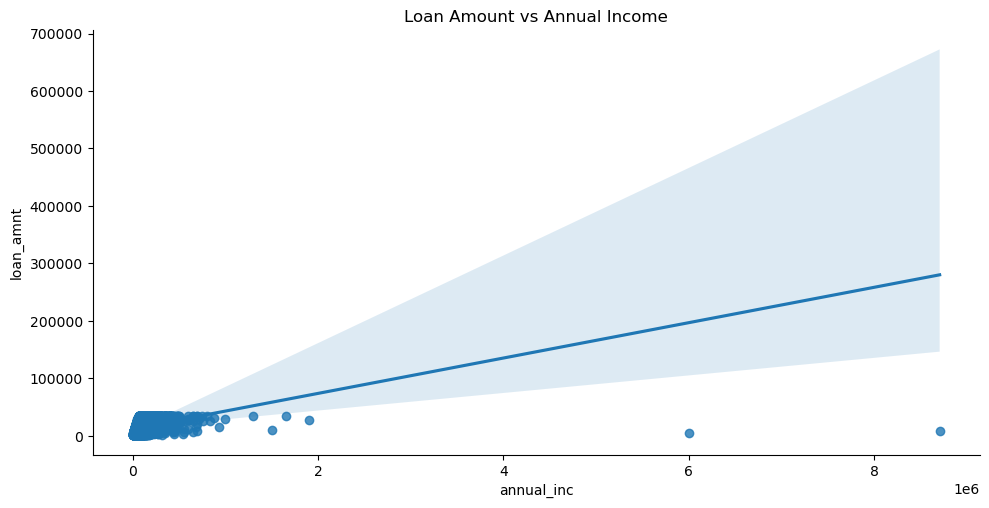

In [45]:
# Scatter plots for pairwise comparisons
sns.pairplot(data[['loan_amnt', 'annual_inc', 'dti','int_rate','grade','sub_grade','purpose','mths_since_last_delinq','delinq_2yrs']])
plt.show()

# Scatter plot with regression line (for two variables)
sns.lmplot(x='annual_inc', y='loan_amnt', data=data, aspect=2)
plt.title('Loan Amount vs Annual Income')
plt.show()


# Summary of Regression Line Plots

## Loan Amount vs. Annual Income
- **Interpretation**: A positive slope indicates that as annual income increases, the loan amount tends to increase. This relationship suggests that higher-income borrowers are likely to request larger loans, reflecting confidence in their ability to repay.

## Loan Amount vs. Debt-to-Income Ratio (DTI)
- **Interpretation**: The slope can indicate whether borrowers with higher DTI ratios tend to request larger loans. A higher DTI generally indicates a higher risk of default, as it suggests a larger portion of income is going towards debt repayment.

## Loan Amount vs. Interest Rate
- **Interpretation**: The relationship may indicate how interest rates impact loan amounts. Higher interest rates could correlate with lower loan amounts as borrowers may avoid taking on high-interest debt.

## Loan Amount vs. Delinquencies in Last 2 Years
- **Interpretation**: A negative slope would suggest that an increase in delinquencies leads to lower loan amounts, highlighting that lenders may be less willing to extend large loans to borrowers with poor repayment history.

## Annual Income vs. DTI
- **Interpretation**: Understanding how income impacts DTI is crucial, as lower DTI ratios are typically preferred by lenders. A higher annual income should, ideally, correlate with a lower DTI, reducing perceived risk.

# Risk Assessment for Lending Decisions

- **Income as an Indicator**: Borrowers with higher annual incomes are generally seen as lower risk, as they have more disposable income to manage repayments. However, income alone does not account for existing debts.

- **DTI Ratio**: A critical metric for lenders, a high DTI suggests that a borrower may struggle to meet new debt obligations. A lower DTI is preferred as it indicates that a manageable portion of income is going toward debt repayment.

- **Credit History and Delinquencies**: Recent delinquencies are strong indicators of future risk. Borrowers with a history of late payments or defaults are likely to be viewed as higher risk. The regression plots can help lenders visualize this relationship and potentially identify thresholds for acceptable risk.

- **Interest Rates**: Understanding how interest rates influence loan amounts can guide lenders in setting terms that mitigate risk while remaining attractive to borrowers. For instance, high-interest rates might deter borrowers with lower incomes or poor credit histories, reducing the lender's risk exposure.

# Conclusion
Regression analysis provides valuable insights into the relationships between key financial metrics. By analyzing these relationships, lenders can make more informed decisions when assessing the risk of lending to potential borrowers. Understanding the dynamics of income, DTI, loan amounts, and repayment behaviors can help financial institutions optimize their lending strategies and reduce the risk of defaults.
